# CE888 Assignment 2 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 2.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 29 March 2019<br> 
**Last modified on**: 18 April 2019<br> 

In [1]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

#import utility as UTL
import assignment2_main as MAIN2
from conf import myVariables as VAR
import load_data as DATA
import preprocess as PREP
import autoencoder as AE
import mlp as MLP
import grid_search as GS


import histogram as HST
import correlation as CRRL
import pca as PCA
import classifier as CLS
import feature_importance as IMP

## 1. Prepare the data
Load data from **data** directory.<br>

### 1-1. Select the data to load
> 0. Human Activity
1. Spam
2. Phishing
>

In [2]:
data_list={0: "human activity", 1: "spam", 2: "phishing"}
data_id=int(input(data_list))

col_names, features_df, targets_df, data_df, pic_file=DATA.load_data(data_id=data_id)
unique_labels=DATA.verify_data(data_df, targets_df, dispaly_range=False)

{0: 'human activity', 1: 'spam', 2: 'phishing'}0


./sub/load_data.py:52: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


Number of NaN: 0
Data shape:  (7352, 562)
Target labels: ['1' '2' '3' '4' '5' '6']
Class distribution: ['0.17', '0.15', '0.13', '0.17', '0.19', '0.19']


### 1-2. Obtain the small data

In [3]:
features, classes=PREP.get_small_data(features_df, targets_df)

Enter the number of samples to use (Total: 7352): 
 - Number of features: 561
 - Minimul data size : 4538
 - Specified size    : 4538



### 1-3. Pre-process the data
Fit the scaler and transform the data.<br>
When the scaler ID is not specified, MinMaxScaler will be applied.

In [4]:
scl, features_nrm=PREP.pre_processing(features, display_result=True)

Select the scaler 0 (None), 1 (MinMax), 2 (Quantile), 3 (Standard): 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Scaler: MinMaxScaler(copy=True, feature_range=(0, 1))
Original data:
               0                1                2                3    \
0  2.7413574e-001  -2.3126162e-002  -1.0521459e-001  -9.9744226e-001   
1  7.0536278e-002   5.8903436e-003  -1.9888667e-001  -9.4441162e-001   
2  4.0105543e-001  -1.2513121e-002  -1.2442772e-001   6.3664921e-002   
3  2.7338334e-001  -1.3484922e-002  -8.7364831e-002  -9.9292357e-001   
4  1.5415589e-001  -3.2268205e-003  -1.3731680e-001  -3.4468857e-001   

               4                5                6                7    \
0  -9.8190889e-001  -9.9364961e-001  -9.9747119e-001  -9.8151597e-001   
1  -8.8586039e-001  -9.0020497e-001  -9.5134787e-001  -8.9593175e-001   
2  -1.7390225e-001  -2.2280359e-001  -2.4029198e-003  -1.7630001e-001   
3  -9.6194054e-001  -9.4550851e-001  -9.9403601e-001  -9.6620088e-001   
4   3.6931970e-001   5.7329007e-001  -3.7178047e-001   3.6859856e-001   

               8                9    ...              551 

### 1-4. Split the data

In [22]:
X, y=features_nrm, classes
X_tr, X_te, y_tr, y_te=PREP.split_data(features_nrm, classes)

Enter the test_size (0<=test_size<1): 
Training: 3630, Test: 908



## 4. Build an Autoencoder
### 4-1. Define the parameters

In [6]:
ae_layers, mode, act, opt, loss, dropout, \
    epochs, verbose, summary_display=AE.get_parameters(data_id)

Define 9 parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.

[Parameter 1/9: Autoencoder type] 0:Normal or 1:Stacked (default=1): 
[Parameter 2/9: Number of neurons in each layer] Integer separated by comma (default=500,400,300,200,100,50,25,10): 
[Parameter 3/9: Activation function] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 


Using TensorFlow backend.


[Parameter 4/9: Optimiser] 0:adam 1:sdg (default=adam): 
 - Learning rate (default=0.010000): 
[Parameter 5/9: Loss function] 0:mse 1:mean_absolute_error 2:mean_squared_logarithmic_error 3:categorical_crossentropy (default=mse): 
[Parameter 6/9: Dropout rate] 0<=rate<1 (default=0.000000): 
[Parameter 7/9: Training epochs] (default=20): 
[Parameter 8/9: Verbose] 0:False or 1:True (default=0): 
[Parameter 9/9: Summary display] 0:False or 1:True (default=0): 

Parameters for the autoencoder are
 1. Mode: 1(Stacked)
 2. Layers: [500, 400, 300, 200, 100, 50, 25, 10]
 3. Activation function: relu
 4. Optimiser: <keras.optimizers.Adam object at 0x11bfe3198>
 5. Loss function: mse
 6. Dropout: 0.000000
 7. Epochs: 20
 8. Verbose: 0(False)
 9. Summary_display: 0(False)


### 4-2. Train the autoencoder

In [7]:
encoder, histories=AE.autoencoder(X, layers=ae_layers, mode=mode, act=act, opt=opt, 
                                 loss=loss, dropout=dropout, epochs=epochs, 
                                 verbose=verbose, summary_display=summary_display)

Training Layer 1/8 ...
Training Layer 2/8 ...
Training Layer 3/8 ...
Training Layer 4/8 ...
Training Layer 5/8 ...
Training Layer 6/8 ...
Training Layer 7/8 ...
Training Layer 8/8 ...


### 4-3. Display the training loss history

Save training loss history as a picture? (y/n): n


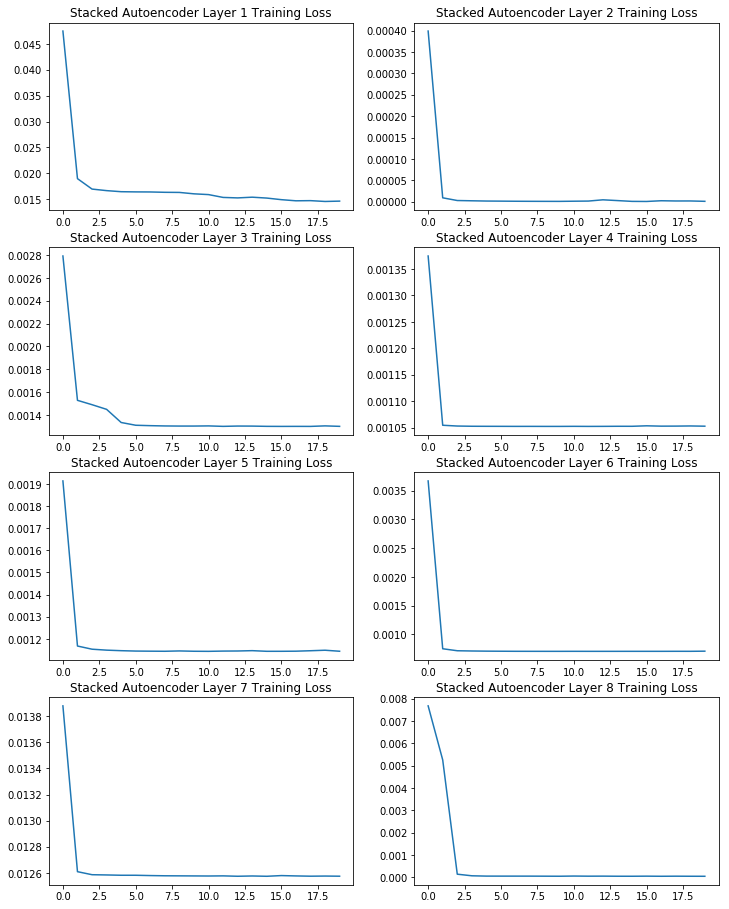

In [8]:
AE.plot_ae_loss_history(histories, mode, pic_file)

### 4-4. Extract features from the datasets

In [9]:
X_all_cmp=encoder.predict(features_nrm)
X_tr_cmp=encoder.predict(X_tr)
X_te_cmp=encoder.predict(X_te)

print("The number of compressed features:", len(X_all_cmp[0]))

The number of compressed features: 10


## 5. Build a discriminative neural network
### 5-1. Define the parameters

In [11]:
finetune, h_num, h_act, out_act, opt, loss, epochs, val_rate, \
    verbose, summary_display=MLP.get_parameters()

Define 10 parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.

[Parameter 1/10: Finetune autoencoder] 0:False or 1:True (default=0): 
[Parameter 2/10: Number of hidden neurons](default=20): 
[Parameter 3/10: Activation function (hidden layer)] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 
[Parameter 4/10: Activation function (hidden layer)] 0:relu 1:sigmoid 2:tanh 3:softmax (default=softmax): 
[Parameter 5/10: Optimiser] 0:adam 1:sdg (default=adam): 
 - Learning rate (default=0.010000): 
[Parameter 6/10: Loss function] 0:mse 1:mean_absolute_error 2:mean_squared_logarithmic_error 3:categorical_crossentropy (default=categorical_crossentropy): 
[Parameter 7/10: Training epochs] (default=20): 
[Parameter 8/10: Validation] 0<rate<1 (default=0.200000): 
[Parameter 9/10: Verbose] 0:False or 1:True (default=0): 
[Parameter 10/10: Summary display] 0:False or 1:True (default=0): 

Parameters for the MLP are
 1. Finetune: : 

### 5-2. Train the MLP

In [41]:
k=ae_layers[-1]
n=len(np.unique(y))

model=MLP.build_mlp(encoder, num_in=k, num_out=n, \
            finetune=finetune, h_num=h_num, h_act=h_act, \
            out_act=out_act, opt=opt, loss=loss, \
            summary_display=summary_display)
histories=MLP.train_mlp(X, y, model, epochs=epochs, \
            val_rate=val_rate, verbose=verbose)

### 5-3. Display the training loss history

In [43]:
histories.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Save training loss history as a picture? (y/n): n


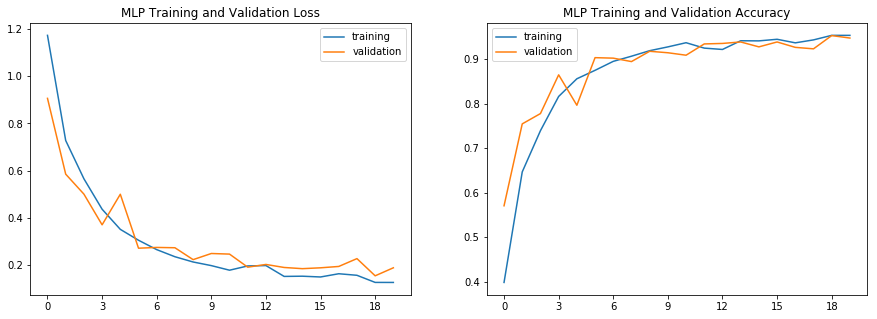

In [13]:
MLP.plot_mlp_loss_history(histories, pic_file)

## 6. Grid Search for optimal parameter
### 6-1. Define the parameters
The codes and markdown below are originally written by the author for the assignment for CE802 which was submitted to the CSEE Department on 16 January 2019.<br><br>
Major parameters to be tuned are:


|parameter               |default    |description                                              |
|------------------------|-----------|---------------------------------------------------------|
|hidden_layer_sizes      |(100,)     |i-th element: numb of neurons in the i-th hidden layer   |
|activation              |"relu"     |activation function                                      |
|solver                  |"adam"     |weight optimasation                                      |
|alpha                   |0.0001     |regularization parameter                                 |
|learning_rate_init      |0.001      |step-size in weights update (solver=’sgd’ or ‘adam’)     |
|max_iter                |200        |max num of iterations                                    |
|momentum                |0.9        |momentum for gradient descent update (range (0, 1), solver=’sgd’|

In [14]:
act, h_num, max_itr, lr, mmt, alpha, solver, splits=GS.get_parameters()

Define 8 parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.

[Parameter 1/8: Activation function] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 
[Parameter 2/8: Hidedn layer size] (default=20): 
[Parameter 3/8: Max iteration] (default=20): 
[Parameter 4/8: Learning rate] 0<=rate<1 (default=0.010000): 
[Parameter 5/8: Momentum] 0<=rate<1 (default=0.800000): 
[Parameter 6/8: Regularization parameter] 0<=rate<1 (default=1.000000): 
[Parameter 7/8: Optimiser] 0:adam 1:sdg (default=adam): 
[Parameter 8/8: Number of grid splits] (default=2): 

Parameters for grid search are
 1. Activation function: relu
 2. Hidden layer size: 20
 3. Maximum iteration: 20
 4. Learning rate: 0.010000)
 5. Momentum: 0.800000)
 6. Regularization parameter: 1.000000)
 7. Solver: adam
 8. Number of splits: 2


### 6-2. Grid Search

In [15]:
param_grid, clf=GS.parameter_grid(activation=act, \
                           alpha=alpha, hidden_layer_sizes=(h_num,), \
                           max_iter=max_itr, learning_rate_init=lr, \
                           momentum=mmt, solver=solver)
if param_grid!=1: GS.grid_search(X, y, clf, param_grid, grid_splits=splits)

Select the parameter to search -  {0: 'Activation function & Solver', 1: 'Learning rate & Momentam', 2: 'Hidden layer size & Regularization parameter', 3: 'Max iteration'}: 0


({'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam']},
 GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size='default',
        train_size=None),
        error_score='raise-deprecating',
        estimator=MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(20,), learning_rate='constant',
        learning_rate_init=0.01, max_iter=20, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='adam', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
        fit_params=None, iid='warn', n_jobs=-1,
        param_grid={'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam']},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=0))

## 6. Evaluation
### 6-1. Cross Validation

In [ ]:
accs, fscores=MLP.cross_validation(model, X, y, epochs=epochs)

### 6-2. Train, predict and evaluate the classifier


< Classification Report >
              precision    recall  f1-score   support

           1    0.89937   0.96622   0.93160       148
           2    0.97727   0.96269   0.96992       134
           3    0.97778   0.88889   0.93122        99
           4    0.92179   0.99398   0.95652       166
           5    1.00000   0.92265   0.95977       181
           6    0.99448   1.00000   0.99723       180

   micro avg    0.96035   0.96035   0.96035       908
   macro avg    0.96178   0.95574   0.95771       908
weighted avg    0.96243   0.96035   0.96040       908


< Accuracy> 0.960352


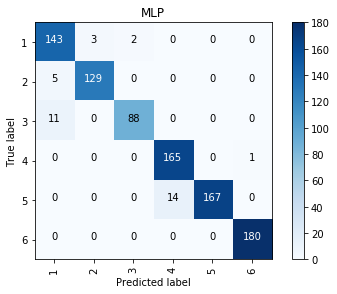

              precision    recall  f1-score   support

           1       0.90      0.97      0.93       148
           2       0.98      0.96      0.97       134
           3       0.98      0.89      0.93        99
           4       0.92      0.99      0.96       166
           5       1.00      0.92      0.96       181
           6       0.99      1.00      1.00       180

   micro avg       0.96      0.96      0.96       908
   macro avg       0.96      0.96      0.96       908
weighted avg       0.96      0.96      0.96       908



In [32]:
def evaluation(XX_tr, yy_tr, XX_te, yy_te):
    from sklearn import metrics

    yy_tr=MLP.multi_class(yy_tr)
    model.fit(XX_tr, yy_tr, verbose=0) 

    pred=model.predict(XX_te)
    pred_df=pd.DataFrame(pred, columns=unique_labels)
    pred=pred_df.idxmax(axis=1)
    
    print ("\n< Classification Report >")
    print (metrics.classification_report(yy_te, pred, digits = 5))
    print ("\n< Accuracy> %f" % metrics.accuracy_score(yy_te, pred))

    return pred

pred=evaluation(X_tr, y_tr, X_te, y_te)
CLS.plot_confusion_matrix(y_te, pred, np.unique(y_te), pic_file, "MLP", "MLP")

### 6-2. Various evaluation metrics on test data

### 6-3. Compare with other procedures

#### (1) Decision Tree

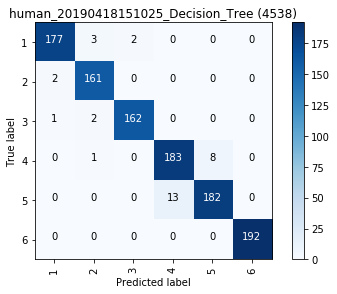

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       182
           2       0.96      0.99      0.98       163
           3       0.99      0.98      0.98       165
           4       0.93      0.95      0.94       192
           5       0.96      0.93      0.95       195
           6       1.00      1.00      1.00       192

   micro avg       0.97      0.97      0.97      1089
   macro avg       0.97      0.97      0.97      1089
weighted avg       0.97      0.97      0.97      1089


< Accuracy> 0.970615


In [38]:
title = "%s_Decision_Tree (%d)" % (pic_file, len(X))
y_te, pred, clf=CLS.train (X_tr, y_tr, 0, 0)
CLS.plot_confusion_matrix(y_te, pred, unique_labels, pic_file, title, "Decision_Tree")

from sklearn import metrics
print ("\n< Accuracy> %f" % metrics.accuracy_score(y_te, pred))

#### (2) Naive Bayes

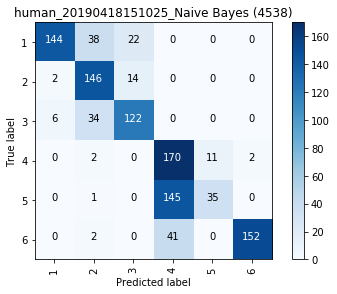

              precision    recall  f1-score   support

           1       0.95      0.71      0.81       204
           2       0.65      0.90      0.76       162
           3       0.77      0.75      0.76       162
           4       0.48      0.92      0.63       185
           5       0.76      0.19      0.31       181
           6       0.99      0.78      0.87       195

   micro avg       0.71      0.71      0.71      1089
   macro avg       0.77      0.71      0.69      1089
weighted avg       0.77      0.71      0.69      1089


< Accuracy> 0.706152


In [39]:
title="%s_Naive Bayes (%d)" % (pic_file, len(X))
y_te, pred, clf=CLS.train(X_tr, y_tr, 1, 0)
CLS.plot_confusion_matrix(y_te, pred, unique_labels, pic_file, title, "Naive Bayes")

print ("\n< Accuracy> %f" % metrics.accuracy_score(y_te, pred))

#### (3) SVM

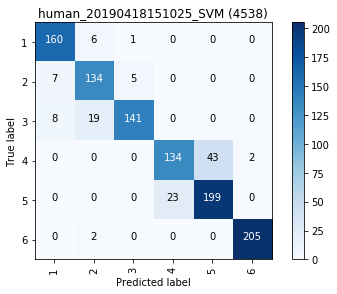

              precision    recall  f1-score   support

           1       0.91      0.96      0.94       167
           2       0.83      0.92      0.87       146
           3       0.96      0.84      0.90       168
           4       0.85      0.75      0.80       179
           5       0.82      0.90      0.86       222
           6       0.99      0.99      0.99       207

   micro avg       0.89      0.89      0.89      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.89      0.89      1089


< Accuracy> 0.893480


In [40]:
title="%s_SVM (%d)" % (pic_file, len(X))
y_te, pred, clf= CLS.train(X_tr, y_tr, 2, data_id)
CLS.plot_confusion_matrix(y_te, pred, unique_labels, pic_file, title, "SVM")

print ("\n< Accuracy> %f" % metrics.accuracy_score(y_te, pred))